In [1]:
import networkx as nx
import numpy as np
import tnetwork as tn
import tnetwork.DCD.externals

import pandas as pd

from matplotlib import pyplot as plt
from tqdm import tqdm

from sklearn.metrics import normalized_mutual_info_score as nmi

import random
import Levenshtein as levenshtein

import pygad

import sys, os
print(os.getcwd())
sys.path.append(os.getcwd() + "/../")
print(sys.path)
from visualize_communities.amalgamate import amalgamate


from sklearn.preprocessing import OneHotEncoder


c:\Users\conta\SciVis\scivis-contest-2023\dis\community_detection
['c:\\Users\\conta\\SciVis\\scivis-contest-2023\\dis\\community_detection', 'C:\\Users\\conta\\.pyenv\\pyenv-win\\versions\\3.10.5\\python310.zip', 'C:\\Users\\conta\\.pyenv\\pyenv-win\\versions\\3.10.5\\DLLs', 'C:\\Users\\conta\\.pyenv\\pyenv-win\\versions\\3.10.5\\lib', 'C:\\Users\\conta\\.pyenv\\pyenv-win\\versions\\3.10.5', 'c:\\Users\\conta\\.virtualenvs\\dis-p10iQwC3', '', 'c:\\Users\\conta\\.virtualenvs\\dis-p10iQwC3\\lib\\site-packages', 'c:\\Users\\conta\\.virtualenvs\\dis-p10iQwC3\\lib\\site-packages\\win32', 'c:\\Users\\conta\\.virtualenvs\\dis-p10iQwC3\\lib\\site-packages\\win32\\lib', 'c:\\Users\\conta\\.virtualenvs\\dis-p10iQwC3\\lib\\site-packages\\Pythonwin', 'c:\\Users\\conta\\SciVis\\scivis-contest-2023\\dis\\community_detection/../']


<<<<<<< local


avg degree 7.4


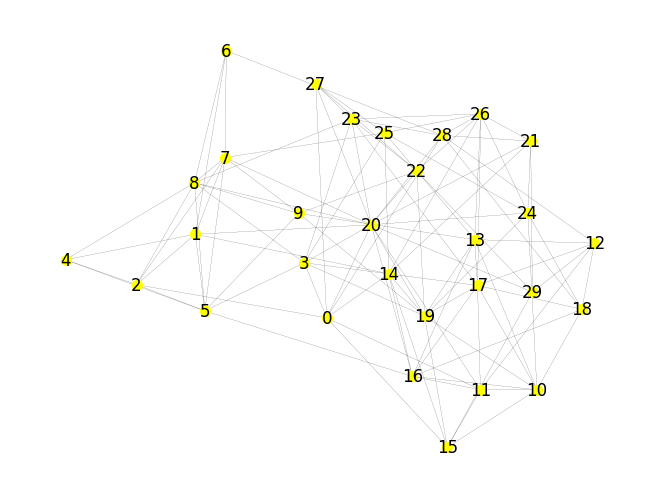

>>>>>>> remote


<<<<<<< local <removed>


avg degree 16.457142857142856


>>>>>>> remote <modified: >


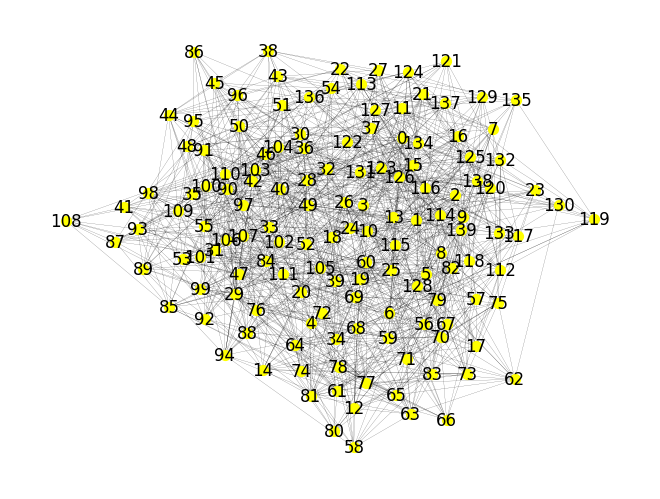

In [ ]:
G = nx.Graph()
n = 30
G.add_nodes_from(range(n))

avg_degree = 7
clusters = 3

timesteps = 50

def initialize_ground_truth():
    ground_truth = {i: {} for i in range(timesteps)}
    for i in range(n):
        ground_truth[0][i] = (i // (n // clusters))
    return ground_truth

ground_truth = initialize_ground_truth()

z = 3
p_out = z / ((n - n // clusters)) 
p_in = (avg_degree - (n - n // clusters) * p_out) / (n // clusters)

def sample_edges(i, t, init=False):
    for j in range(n):
        if i == j or (init and i > j):
            continue

        if ground_truth[t][i] == ground_truth[t][j] and np.random.random() < p_in:
            G.add_edge(i, j)
        elif np.random.random() < p_out:
            G.add_edge(i, j)

for i in range(n):
    sample_edges(i, 0, init=True)

nx.draw(G, pos=nx.spring_layout(G), node_size=50, width=0.1, node_color='yellow', with_labels=True)

print("avg degree", np.mean(list(dict(G.degree()).values())))

DG = tn.DynGraphSN()
DG.add_snapshot(0, G)


In [ ]:

nc = 0.3
ground_truth = initialize_ground_truth()


for t in range(1, timesteps):
    G = DG.snapshots(t-1).copy()
    ground_truth[t] = ground_truth[t - 1].copy()

    move_nodes = random.sample(list(G.nodes()), int(nc * n))
    
    for node in move_nodes:
        new_community = random.sample([i for i in range(clusters) if i != ground_truth[t][node]], 1)[0]
        ground_truth[t][node] = new_community
        G.remove_edges_from(list(G.edges(node)))
        sample_edges(node, t)

    DG.add_snapshot(t, G)

<<<<<<< local


{0: 2, 1: 0, 2: 2, 3: 1, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 2, 12: 1, 13: 0, 14: 1, 15: 0, 16: 2, 17: 1, 18: 1, 19: 1, 20: 0, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2}
30
[2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2]


{0: 0, 1: 0, 2: 2, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 2, 12: 0, 13: 0, 14: 0, 15: 1, 16: 4, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 1, 23: 0, 24: 1, 25: 0, 26: 3, 27: 1, 28: 3, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 4, 43: 1, 44: 1, 45: 2, 46: 1, 47: 1, 48: 1, 49: 2, 50: 1, 51: 1, 52: 0, 53: 1, 54: 1, 55: 1, 56: 2, 57: 1, 58: 0, 59: 2, 60: 2, 61: 2, 62: 1, 63: 2, 64: 2, 65: 1, 66: 2, 67: 2, 68: 3, 69: 2, 70: 2, 71: 3, 72: 2, 73: 2, 74: 2, 75: 4, 76: 2, 77: 0, 78: 2, 79: 0, 80: 0, 81: 2, 82: 2, 83: 2, 84: 3, 85: 0, 86: 3, 87: 3, 88: 2, 89: 4, 90: 3, 91: 3, 92: 3, 93: 3, 94: 3, 95: 3, 96: 3, 97: 3, 98: 3, 99: 3, 100: 3, 101: 3, 102: 3, 103: 3, 104: 2, 105: 0, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 4, 114: 4, 115: 2, 116: 4, 117: 4, 118: 0, 119: 4, 120: 4, 121: 4, 122: 0, 123: 4, 124: 3, 125: 3, 126: 3, 127: 2, 128: 0, 129: 4, 130: 1, 131: 4, 132: 4, 133: 4, 134: 1, 135: 4, 136: 4, 137: 4, 138: 

>>>>>>> remote


<<<<<<< local <modified: text/plain>


>>>>>>> remote <modified: text/plain>


<<<<<<< local


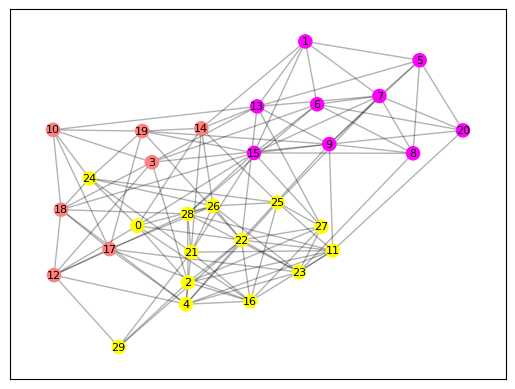

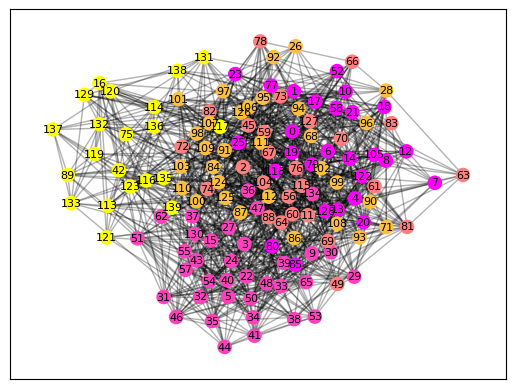

>>>>>>> remote


In [ ]:
# nx.draw(DG.snapshots(1), node_size=10, width=0.1, node_color='black')
t = 1
print(ground_truth[t])
G = DG.snapshots(t)
print(G.number_of_nodes())
pos = nx.spring_layout(G)
node_color = [b for a, b in sorted(ground_truth[t].items(), key=lambda x: x[0])]
print(node_color)

nx.draw_networkx_nodes(G, pos, node_size=90, cmap=plt.cm.spring, node_color=node_color)
nx.draw_networkx_labels(G, pos, labels={i: i for i in range(n)}, font_size=8)
nx.draw_networkx_edges(G, pos, alpha=0.3)


In [ ]:
def flip_partitioning(partitioning):
    nodes = [item for sublist in partitioning.values() for item in sublist]
    return dict(zip(nodes, map(lambda x: next(int(k) for k in partitioning.keys() if x in partitioning[k]), nodes)))

def fix_partitioning_snapshot(P):
    
    fixed = {int(k[3:]): v for k, v in P.items()}
    return fixed

def fix_label_smoothing(communities):
    new_communities = tn.DynCommunitiesSN()
    for t in communities.snapshots_timesteps():
        snapshot = fix_partitioning_snapshot(communities.snapshots[t])
        new_communities.set_communities(t, snapshot)
    return new_communities


In [ ]:
def stupid_louvain(DG):
    communities = tn.DynCommunitiesSN()
    for t in tqdm(DG.snapshots_timesteps()):
        coms = nx.community.louvain_communities(DG.snapshots(t))
        coms = {i: list(c) for i, c in enumerate(coms)}
        communities.set_communities(t, coms)
    return communities

stupid_louvain_coms = stupid_louvain(DG)
print(stupid_louvain_coms.snapshots[1])

<<<<<<< local <modified: >


100%|██████████| 50/50 [00:00<00:00, 247.44it/s]

100%|██████████| 100/100 [00:00<00:00, 113.73it/s]

>>>>>>> remote <modified: >


<<<<<<< local


{0: [17, 18, 3, 10, 12, 28], 1: [1, 5, 6, 7, 8, 9, 13, 15, 20], 2: [0, 19, 24, 26, 14], 3: [2, 4, 11, 16, 21, 22, 23, 25, 27, 29]}


{0: [129, 131, 132, 133, 135, 136, 137, 138, 75, 139, 16, 82, 89, 42, 113, 114, 116, 117, 119, 120, 121, 123, 60], 1: [130, 3, 5, 134, 9, 15, 22, 24, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 50, 51, 53, 54, 55, 57, 62, 65, 80], 2: [0, 128, 2, 1, 4, 6, 7, 8, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 23, 25, 36, 45, 49, 52, 56, 58, 59, 61, 63, 64, 66, 67, 69, 70, 72, 73, 74, 76, 77, 78, 79, 81, 83, 85, 88, 104, 105, 115, 118, 122, 127], 3: [68, 71, 84, 86, 87, 26, 90, 91, 92, 94, 28, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 124, 125, 126]}


>>>>>>> remote


In [ ]:
def amalgamate_stupid_louvain(DG):
    communities = stupid_louvain(DG)
    snapshots = []
    for t in communities.snapshots_timesteps():
        snapshot = communities.snapshots[t]
        flipped = flip_partitioning(snapshot)
        # print(flipped)
        snapshots.append(flipped)
    df = pd.DataFrame.from_dict(snapshots).transpose()
    df.sort_index(inplace=True)
    df.rename(columns={c: f"c{c}" for c in df.columns}, inplace=True)
    amalgamated = amalgamate(df, 1, timesteps)
    new_communities = tn.DynCommunitiesSN()
    for t in communities.snapshots_timesteps():
        snapshot = amalgamated[f"c{t}"].to_dict()
        coms = {i: [k for k, v in snapshot.items() if v == i] for i in set(snapshot.values())}
        new_communities.set_communities(t, coms)
    return new_communities

print(amalgamate_stupid_louvain(DG).snapshots[0])
    

<<<<<<< local <modified: >


100%|██████████| 50/50 [00:00<00:00, 273.54it/s]


100%|██████████| 100/100 [00:00<00:00, 113.57it/s]


>>>>>>> remote <modified: >


<<<<<<< local


{0: [1, 2, 4, 5, 6, 7, 8, 9], 1: [10, 11, 12, 13, 15, 16, 17, 18, 19], 2: [14, 21, 24, 25, 26], 3: [0, 3, 20, 22, 23, 27, 28, 29]}


>>>>>>> remote


<<<<<<< local <removed>


{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], 1: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55], 2: [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83], 3: [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111], 4: [112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]}


>>>>>>> remote <modified: >


In [ ]:
algorithms = {
    # "estrangement_confinement": lambda x: tnetwork.DCD.externals.estrangement_confinement(x, convergence_tolerance=0.1),
    "label smoothing": tnetwork.DCD.label_smoothing,
    "smoothed louvain": tnetwork.DCD.smoothed_louvain,
    "stupid louvain": stupid_louvain,
    "amalgamated stupid louvain": amalgamate_stupid_louvain
}

DCDs = {}

for name, algo in algorithms.items():
    print(name)
    communities = algo(DG)
    if name == "label smoothing":
        communities = fix_label_smoothing(communities)
    DCDs[name] = communities
# louvain_communities = tnetwork.DCD.smoothed_louvain(DG)

  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


label smoothing
starting label_smoothing


<<<<<<< local


 24% (12 of 50) |#####                   | Elapsed Time: 0:00:00 ETA:  00:00:00
 50% (25 of 50) |############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 78% (39 of 50) |##################      | Elapsed Time: 0:00:00 ETA:   0:00:00
  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  6% (6 of 100) |#                       | Elapsed Time: 0:00:00 ETA:  00:00:00
 12% (12 of 100) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 18% (18 of 100) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 25% (25 of 100) |#####                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 30% (30 of 100) |######                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 35% (35 of 100) |########               | Elapsed Time: 0:00:00 ETA:   0:00:00
 41% (41 of 100) |#########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 47% (47 of 100) |##########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (54 of 100) |############           | Elapsed Time: 0:00:00 ETA:   0:00:00
 59% (59 of 100) |#############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 64% (64 of 100) |##############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 69% (69 of 100) |###############        | Elapsed Time: 0:00:00 ETA:   0:00:00
 74% (74 of 100) |#################     

>>>>>>> remote


smoothed louvain
starting smoothed_louvain


<<<<<<< local


 26% (13 of 50) |######                  | Elapsed Time: 0:00:00 ETA:  00:00:00
 50% (25 of 50) |############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 68% (34 of 50) |################        | Elapsed Time: 0:00:00 ETA:   0:00:00
 88% (44 of 50) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00


  7% (7 of 100) |#                       | Elapsed Time: 0:00:00 ETA:  00:00:00
 16% (16 of 100) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:00
 25% (25 of 100) |#####                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 33% (33 of 100) |#######                | Elapsed Time: 0:00:00 ETA:   0:00:00
 40% (40 of 100) |#########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 46% (46 of 100) |##########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 52% (52 of 100) |###########            | Elapsed Time: 0:00:00 ETA:   0:00:00
 60% (60 of 100) |#############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 68% (68 of 100) |###############        | Elapsed Time: 0:00:00 ETA:   0:00:00
 74% (74 of 100) |#################      | Elapsed Time: 0:00:00 ETA:   0:00:00
 82% (82 of 100) |##################     | Elapsed Time: 0:00:00 ETA:   0:00:00
 89% (89 of 100) |####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
 97% (97 of 100) |######################

>>>>>>> remote


stupid louvain


<<<<<<< local <modified: >


100%|██████████| 50/50 [00:00<00:00, 350.67it/s]


100%|██████████| 100/100 [00:00<00:00, 114.39it/s]


>>>>>>> remote <modified: >


amalgamated stupid louvain


<<<<<<< local <modified: >


100%|██████████| 50/50 [00:00<00:00, 316.76it/s]


100%|██████████| 100/100 [00:00<00:00, 113.13it/s]


>>>>>>> remote <modified: >


In [9]:
print(DCDs["stupid louvain"].snapshots[0])

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], 1: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55], 2: [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 56, 57, 58, 59, 60, 61, 62, 63], 3: [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111], 4: [128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]}


In [ ]:
def number_of_births_or_deaths(G1, G2, C1, C2):
    C1 = flip_partitioning(C1)
    C2 = flip_partitioning(C2)
    return len(set(C2.values()) ^ set(C1.values()))

def estrangement(G1, G2, C1, C2):
    C1 = flip_partitioning(C1)
    C2 = flip_partitioning(C2)
    estranged = 0

    G1edges = G1.edges()

    for edge in G2.edges():
        if edge not in G1edges:
            # edges that are not in G1 are not estranged
            continue
        if C1[edge[0]] != C1[edge[1]]:
            # only edges that connected nodes in the same community can be estranged
            continue
        if C2[edge[0]] != C2[edge[1]]:
            estranged += 1
    if len(G2.edges()) == 0:
        return np.nan
    return estranged / len(G2.edges())


def lev(s, t):
    m, n = len(s), len(t)
    
    v0 = np.arange(n + 1)
    v1 = np.zeros(n + 1)
    
    for i in range(m):

        v1[0] = i + 1

        for j in range(n):

            deletion_cost = v0[j + 1] + 1
            insertion_cost = v1[j] + 1
            if s[i] == t[j]:
                substitution_cost = v0[j]
            else:
                substitution_cost = v0[j] + 1

            v1[j + 1] = min(deletion_cost, insertion_cost, substitution_cost)

        v0, v1 = v1, v0
    return v0[n] / max(m, n)

def levenshtein_stability(G1, G2, C1, C2):
    C1 = flip_partitioning(C1)
    C2 = flip_partitioning(C2)

    # get values sorted by key
    a = [C1[k] for k in sorted(C1.keys())]
    b = [C2[k] for k in sorted(C2.keys())]

    if min(len(a), len(b)) == 0:
        return np.nan

    return levenshtein.distance(a, b) / max(len(a), len(b))

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def cosine_similarity_stability(G1, G2, C1, C2):
    C1 = flip_partitioning(C1)
    C2 = flip_partitioning(C2)

    # get values sorted by key
    a = [C1[k] for k in sorted(C1.keys())]
    b = [C2[k] for k in sorted(C2.keys())]

    if min(len(a), len(b)) == 0:
        return np.nan
    # pad with zeros to get same length
    if len(a) < len(b):
        a = np.pad(a, (0, len(b) - len(a)), 'constant', constant_values=-1)
    elif len(b) < len(a):
        b = np.pad(b, (0, len(a) - len(b)), 'constant', constant_values=-1)
    

    # one hot encode
    categories = np.unique(np.concatenate((a, b)))
    encoder = OneHotEncoder(categories=[categories])
    a = encoder.fit_transform(np.array(a).reshape(-1, 1)).toarray().flatten()
    b = encoder.fit_transform(np.array(b).reshape(-1, 1)).toarray().flatten()

    return cosine_similarity(a, b)


def NMI(G1, G2, C1, C2):
    C1 = flip_partitioning(C1)
    C2 = flip_partitioning(C2)
    return nmi(list(C1.values()), list(C2.values()))

def community_stability(DG, communities, metric, measures_instability=False, **kwargs):
    values = []
    plot = kwargs.get("plot", False)
    if plot:
        fig, axs = plt.subplots(7, 5, figsize=(16, 12))
        axs = axs.flatten()
    for i in tqdm(range(1, len(DG.snapshots_timesteps()))):
        G1 = DG.snapshots(i - 1)
        G2 = DG.snapshots(i)
        C1 = communities.snapshots[i - 1]
        C2 = communities.snapshots[i]
        if plot:
            score = metric(G1, G2, C1, C2, axs[i-1], **kwargs)
        else:
            score = metric(G1, G2, C1, C2, **kwargs)
        values.append(score)
    if plot:
        for i in range(len(DG.snapshots_timesteps())-1, len(axs)):
            axs[i].axis('off')
        plt.tight_layout()
        plt.show()
    if measures_instability:
        # return values
        return [1 - x for x in values]
    else:
        return values
    
metrics = {
    # "births or deaths": (number_of_births_or_deaths, False),  # ~1 second
    "levenshtein": (levenshtein_stability, True),
    "estrangement": (estrangement, True),
    "cosine similarity": (cosine_similarity_stability, False),
    "NMI": (NMI, False),
}
community_scores = {}
for algo_name, communities in DCDs.items():
    for name, (metric, instability) in metrics.items():
        community_scores[f"{algo_name} {name}"] = community_stability(DG, communities, metric, measures_instability=instability)

<<<<<<< local


100%|██████████| 49/49 [00:00<00:00, 628.59it/s]


100%|██████████| 99/99 [00:00<00:00, 1217.33it/s]


>>>>>>> remote


In [ ]:

def snapshot_goodness(DG, communities, metric, measures_cost=False, **kwargs):
    values = []

    for i in tqdm(range(0, len(DG.snapshots_timesteps())-1)):
        G = DG.snapshots(i)
        C = communities.snapshots[i]


        C = C.values()
        score = metric(G, C)
        values.append(score)

    if measures_cost:
        # return values
        return [1 - x for x in values]
    else:
        return values


snapshot_metrics = {
    "modularity": (nx.algorithms.community.modularity, False),
    # "conductance": (nx.algorithms.community., False),
}

snapshot_scores = {}
for algo_name, communities in DCDs.items():
    for name, (metric, instability) in snapshot_metrics.items():
        snapshot_scores[f"{algo_name} {name}"] = snapshot_goodness(DG, communities, metric, measures_cost=instability)


<<<<<<< local


100%|██████████| 49/49 [00:00<00:00, 3447.30it/s]


100%|██████████| 99/99 [00:00<00:00, 1734.16it/s]


>>>>>>> remote


TypeError: modularity() missing 1 required positional argument: 'communities'

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))


for name, score in community_scores.items():
    if name.startswith("amal"):

        ax.plot(score, label=name, alpha=1, linestyle="--", marker="o", markersize=3, linewidth=1)
# ax.plot(summary_scores, label="summary_distance")
# plt.plot(community_scores, label="levenshtein_stability")
# plt.ylim((0, 1.1))

plt.legend()
# plt.grid()
ax.set_xticks(range(0, len(DG.snapshots_timesteps()), 10))

# plt.plot(stability_scores)
plt.show()

<<<<<<< local


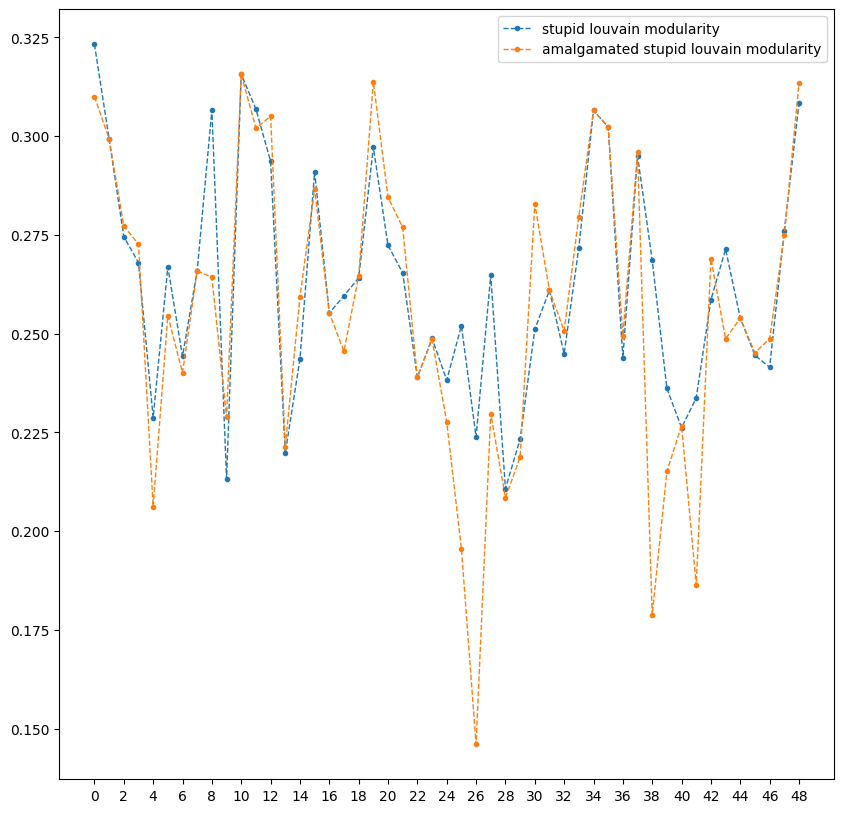

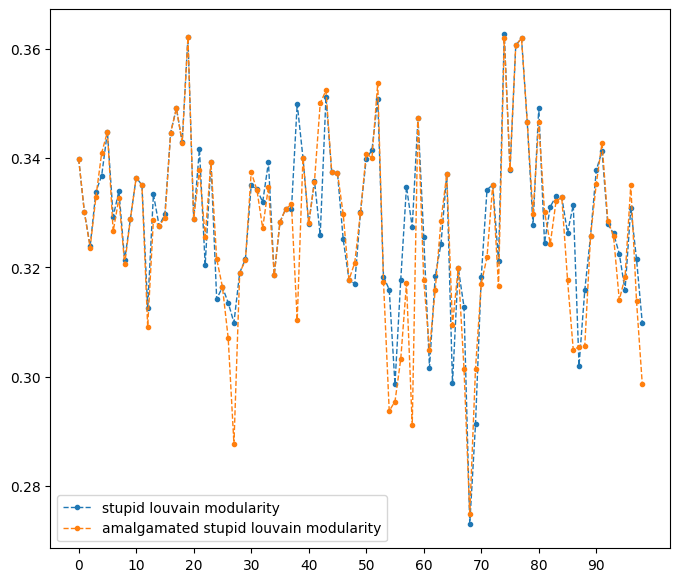

>>>>>>> remote


In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))


for name, score in snapshot_scores.items():
    if name.find("stupid") != -1:
        ax.plot(score, label=name, alpha=1, linestyle="--", marker="o", markersize=3, linewidth=1)
# ax.plot(summary_scores, label="summary_distance")
# plt.plot(community_scores, label="levenshtein_stability")
# plt.ylim((0, 1.1))

plt.legend()
# plt.grid()
ax.set_xticks(range(0, len(DG.snapshots_timesteps()), 2))
# ax.set_ylim((0, 1.1))
# plt.plot(stability_scores)
plt.show()

['red', 'blue', 'green', 'purple', 'pink', 'brown', 'yellow', 'orange', 'grey', 'black']


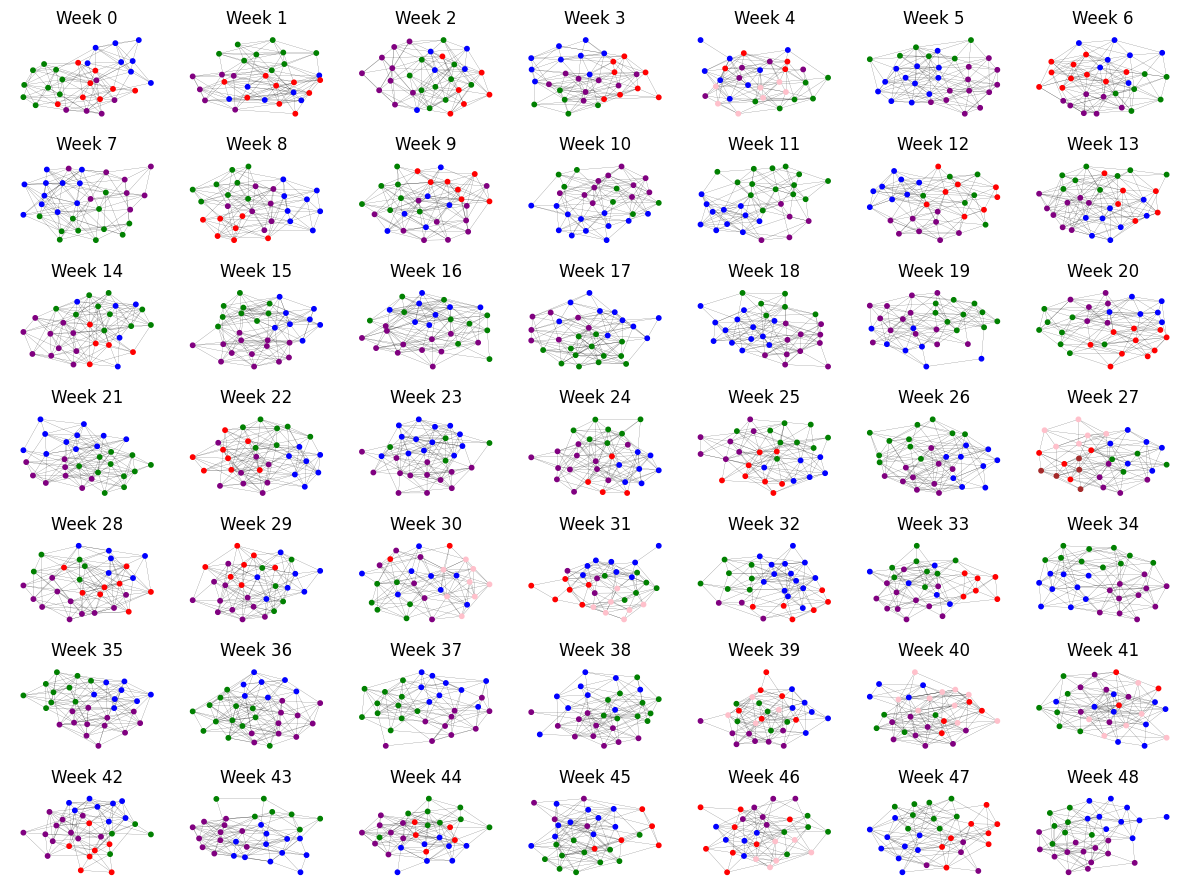

In [155]:
fig, axs = plt.subplots(7, 7, figsize=(12, 9))
axs = axs.flatten()

from collections import OrderedDict

colors = ["red", "blue", "green", "purple", "pink", "brown", "yellow", "orange", "grey", "black", ]
# colors = [distinctipy.get_hex(c) for c in distinctipy.get_colors(150)]
print(colors)

seen_communities = OrderedDict()
poss = {}
for i, ax in enumerate(axs):
    if i >= len(DG.snapshots_timesteps()):
        ax.axis("off")
        continue
    snapshot = DG.snapshots(i)
    communities_snapshot = DCDs["stupid louvain"].snapshots[i]
    
    partition_snapshot = list(map(lambda x: next(int(k) for k in communities_snapshot.keys() if x in communities_snapshot[k]), snapshot.nodes()))
    distinct_communities = list(dict.fromkeys(partition_snapshot))

    for k in distinct_communities:
        if k not in seen_communities:
            seen_communities[k] = len(seen_communities)

    short = {k: seen_communities[k] for k in distinct_communities}

    partition_snapshot_norm = [short[c] for c in partition_snapshot]
    try:
        coloring = [colors[x] for x in partition_snapshot_norm]
    except IndexError:
        print(f"{i} {len(colors)} {max(partition_snapshot)}")
        raise
    pos = nx.kamada_kawai_layout(snapshot)
    poss[i] = pos
    nx.draw(snapshot, pos=pos, node_size=10, width=0.1, ax=ax, node_color=coloring)
    ax.set_title(f"Week {i}")

plt.tight_layout()
plt.savefig("synthetic1.png")
# plt.close()

['red', 'blue', 'green', 'purple', 'pink', 'brown', 'yellow', 'orange', 'grey', 'black']


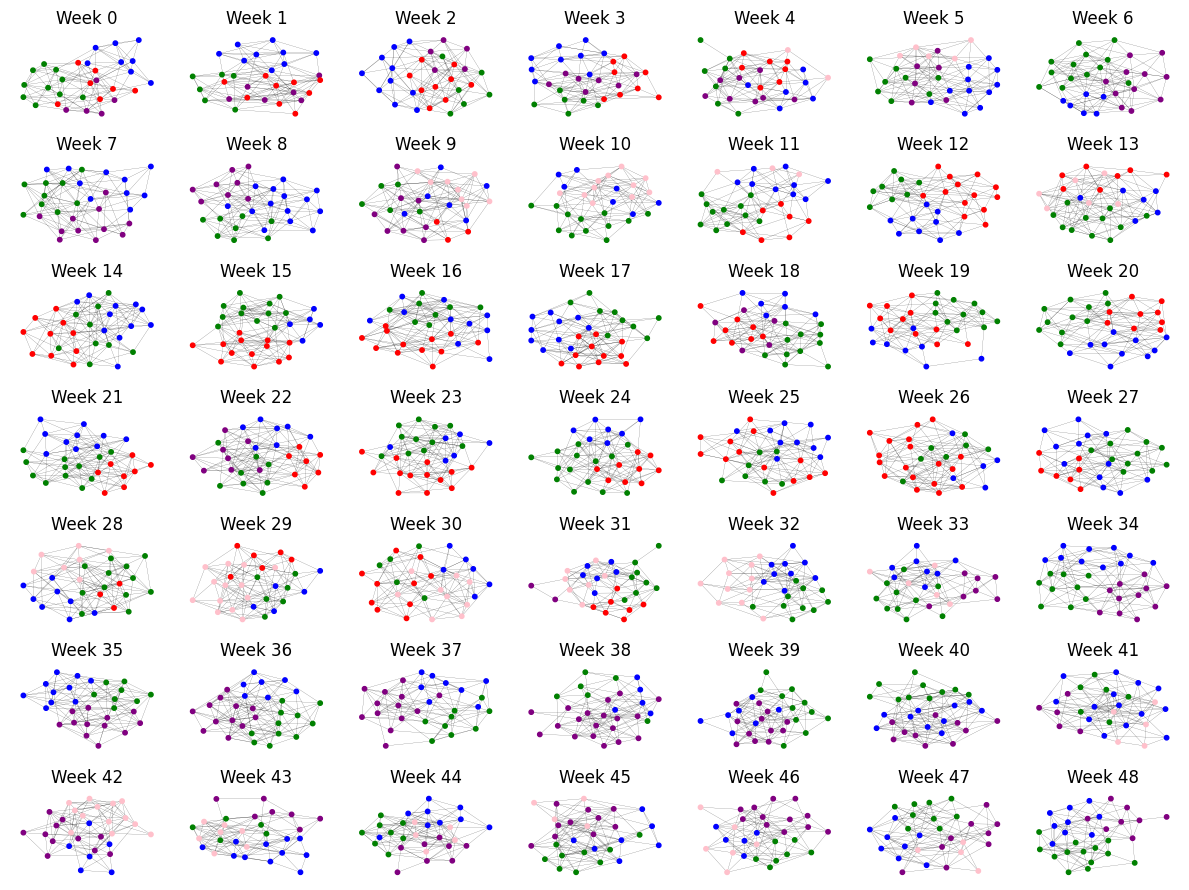

In [156]:
fig, axs = plt.subplots(7, 7, figsize=(12, 9))
axs = axs.flatten()

from collections import OrderedDict

colors = ["red", "blue", "green", "purple", "pink", "brown", "yellow", "orange", "grey", "black", ]
# colors = [distinctipy.get_hex(c) for c in distinctipy.get_colors(150)]
print(colors)

seen_communities = OrderedDict()

for i, ax in enumerate(axs):
    if i >= len(DG.snapshots_timesteps()):
        ax.axis("off")
        continue
    snapshot = DG.snapshots(i)
    communities_snapshot = DCDs["amalgamated stupid louvain"].snapshots[i]
    
    partition_snapshot = list(map(lambda x: next(int(k) for k in communities_snapshot.keys() if x in communities_snapshot[k]), snapshot.nodes()))
    distinct_communities = list(dict.fromkeys(partition_snapshot))

    for k in distinct_communities:
        if k not in seen_communities:
            seen_communities[k] = len(seen_communities)

    short = {k: seen_communities[k] for k in distinct_communities}

    partition_snapshot_norm = [short[c] for c in partition_snapshot]
    try:
        coloring = [colors[x] for x in partition_snapshot_norm]
    except IndexError:
        print(f"{i} {len(colors)} {max(partition_snapshot)}")
        raise
    nx.draw(snapshot, pos=poss[i], node_size=10, width=0.1, ax=ax, node_color=coloring)
    ax.set_title(f"Week {i}")

plt.tight_layout()
plt.savefig("synthetic2.png")
# plt.close()

In [ ]:
pygad.GA